<a href="https://www.kaggle.com/code/deepbodkhe/electronic-repair-service-market-segmentation?scriptVersionId=224094197" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **About the Project**
This project aims to analyze and segment the **Electronic Products & Repair Service Market Analysis** using a dataset of **15,000+ products** from **Datafiniti’s Product Database**.  
The study focuses on identifying **market trends, brand dominance, and pricing behavior** to help businesses optimize their strategies.  

Additionally, this analysis extends to the Repair Service Market, identifying which brands and categories will drive demand for repairs & servicing.  


# Project Objectives

1. **Market Segmentation:**
   - Identify top-performing brands & categories based on frequency.
  
2. **Pricing Trends Analysis:**
   - Examine price variations across different brands, conditions, and merchants.

3. **Brand Performance Evaluation:**
   - Rank brands based on sales volume, pricing range, and market penetration.

4. **Repair Service Market Insights:**
   - Identify brands & categories that contribute to the repair industry.

5. **Predictive Analytics for Market Trends:**
   - Advanced Machine Learning techniques (PCA & K-Means Clustering) were applied to uncover market patterns and segment brands based on pricing behavior.

# Datasets Used

- **Datafiniti Electronics Products Pricing Data**  
  - A dataset containing **over 15,000 electronic products** with details such as:
  
    🔹 **Brand & Category** → For segmentation & repair market analysis.  
    🔹 **Merchant & Condition** → To study price variation across sellers.  
    🔹 **Pricing (Min, Max, Avg)** → To track market trends & price fluctuations.  
    🔹 **Date Added** → To analyze price movement over time.  

# Potential Applications

1. **Retail & E-Commerce Strategies:**  
   - Help retailers and online platforms optimize product pricing & inventory.  

2. **Repair Market Forecasting:**  
   - Identify electronic brands & categories with high repair service demand. 

3. **Business Expansion Planning:**  
   - Assist manufacturers & investors in targeting profitable segments.  

4. **Consumer Behavior Analysis:**  
   - Predict how price & brand reputation affect customer buying patterns.  

5. **Predictive Analytics for Market Trends:**  
   - Use AI-driven clustering to group brands based on pricing behavior.  

# Repair Service Market Analysis (Derived Insights)
By analyzing **brands** and **categories**, this study predicts which **electronic devices are most likely to require repairs**.  

📌 **Key Factors Considered:**  
✔ High-Sale Brands with Varied Conditions → Indicate high repair potential.  
✔ Categories with Frequent Price Drops → Suggest shorter product lifespans.  
✔ Correlation Between Price & Condition → Helps determine repair feasibility.  

**🙏 Acknowledgments**  
- **Data Source:** Extracted from **Datafiniti’s Product Database**.  
- **Libraries Used:** Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn for data analysis & visualization.  

🚀 **This research provides actionable insights into market trends & the evolving demand for electronic repair services!** 🎯  

In [1]:
# 📌 Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 📂 Step 1: Load & Preprocess the Dataset

In [2]:
# 📂 Load & Preprocess the Dataset
file_path = "/kaggle/input/data-finiti-electronics-products-pricing-data/DatafinitiElectronicsProductsPricingData.csv"
df = pd.read_csv(file_path)

In [3]:
# 📌 Drop unnecessary columns
df.drop(columns=["Unnamed: 26", "Unnamed: 27", "Unnamed: 28", "Unnamed: 29", "Unnamed: 30"], inplace=True, errors='ignore')

# 📌 Handle missing values
df.dropna(subset=["brand", "categories"], inplace=True)
df["prices.merchant"].fillna("Unknown", inplace=True)
df["prices.condition"].fillna("Unknown", inplace=True)

# 📌 Convert price columns to numeric
df["prices.amountMax"] = pd.to_numeric(df["prices.amountMax"], errors="coerce")
df["prices.amountMin"] = pd.to_numeric(df["prices.amountMin"], errors="coerce")

# 📌 Create a new column for average price
df["avg_price"] = df[["prices.amountMax", "prices.amountMin"]].mean(axis=1)

# 📊 Visualization 1: Top 10 Brands by Product Count 

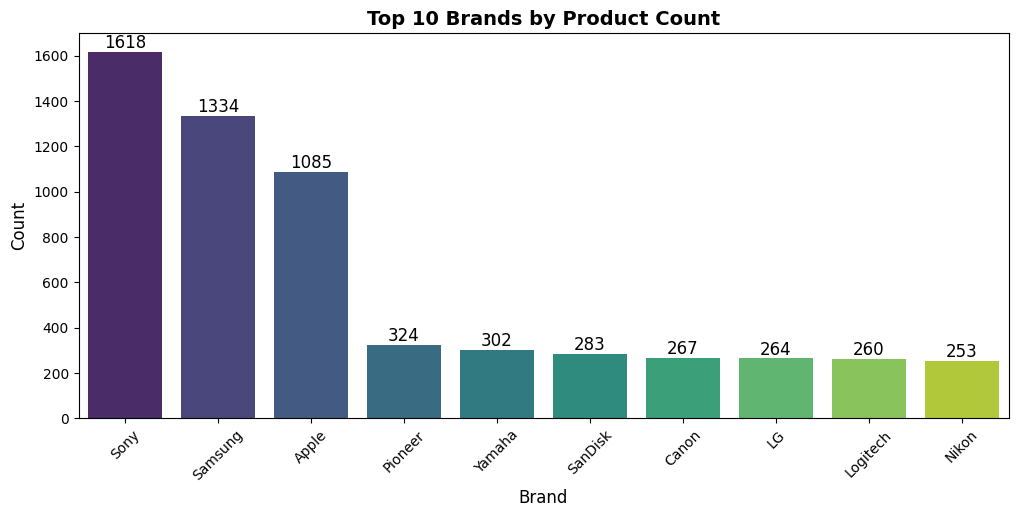

In [4]:
# Identify Top Brands & Categories
top_brands = df["brand"].value_counts().head(10)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")

#  Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=45)
plt.title("Top 10 Brands by Product Count", fontsize=14,  fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 📊 Visualization 2: Top 10 Categories by Product Count

In [5]:
#  Ensure categories are sorted
top_categories = df["categories"].value_counts().head(10).sort_values(ascending=False)

#  Shorten category names for readability
shortened_categories = [cat[:10] + "..." if len(cat) > 10 else cat for cat in top_categories.index]

**📊 Horizontal Bar Chart for Categories by Product Count**

**📊 Pie Chart for Category Distribution** 

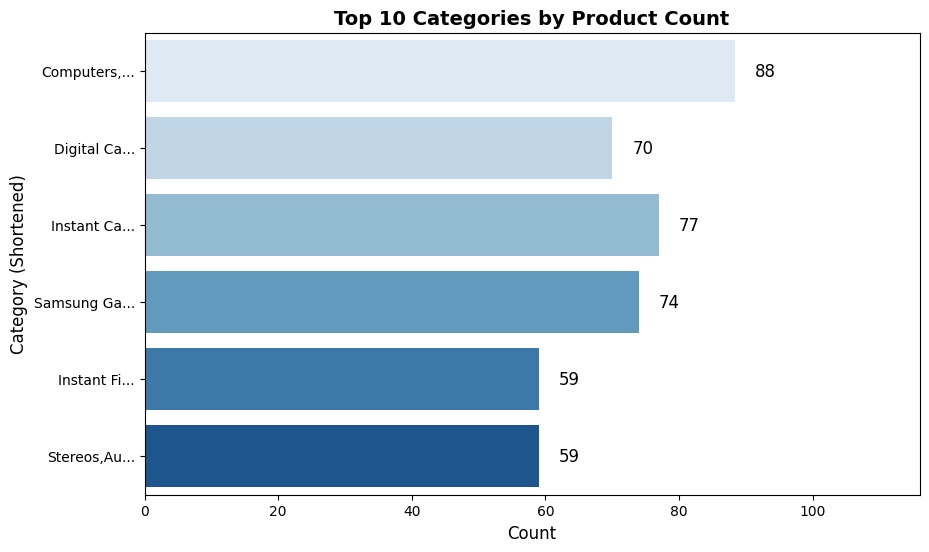

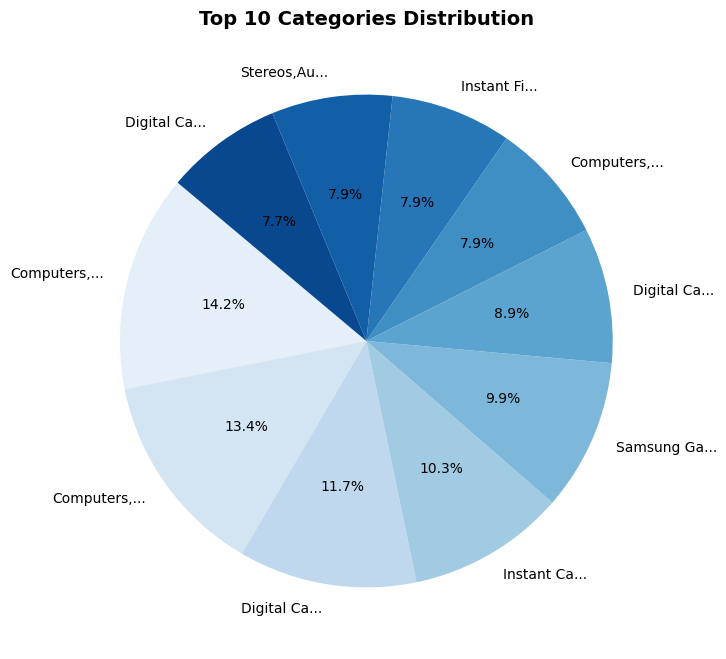

In [6]:
# Horizontal Bar Chart for Categories by Product Count
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=shortened_categories, x=top_categories.values, palette="Blues", orient='h', errorbar=None)

# Add count labels at the end of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 3, p.get_y() + p.get_height() / 2),  
                ha='left', va='center', fontsize=12, color='black')

plt.title("Top 10 Categories by Product Count", fontsize=14, fontweight="bold")
plt.ylabel("Category (Shortened)", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.xlim(0, top_categories.max() + 10)
plt.show()

# Pie Chart for Category Distribution
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Blues", len(top_categories))  
plt.pie(top_categories.values, labels=shortened_categories, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Top 10 Categories Distribution", fontsize=14 ,fontweight="bold")
plt.show()

# 📊 Visualization 3: Price Distribution Across Brands

**📊 Violin & Box Plot - Price Distribution by Brand**

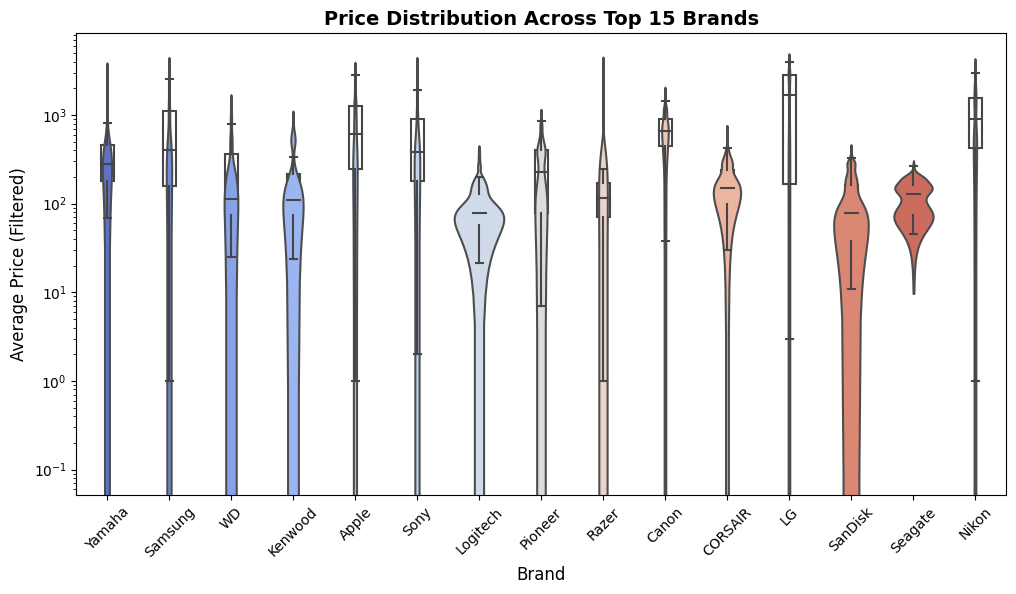

In [7]:
#Price Distribution Across Brands

price_threshold = df["avg_price"].quantile(0.99)
df_filtered = df[df["avg_price"] <= price_threshold]

top_brands = df_filtered["brand"].value_counts().nlargest(15).index
df_top_brands = df_filtered[df_filtered["brand"].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_brands, x="brand", y="avg_price", palette="coolwarm", inner=None)
sns.boxplot(data=df_top_brands, x="brand", y="avg_price", width=0.2, showfliers=False, boxprops={"facecolor": "none"})
plt.xticks(rotation=45)
plt.title("Price Distribution Across Top 15 Brands", fontsize=14 ,fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Average Price (Filtered)", fontsize=12)
plt.yscale("log")
plt.show()

**📊 Line &  Bar Chart - Average Price Per Brand**

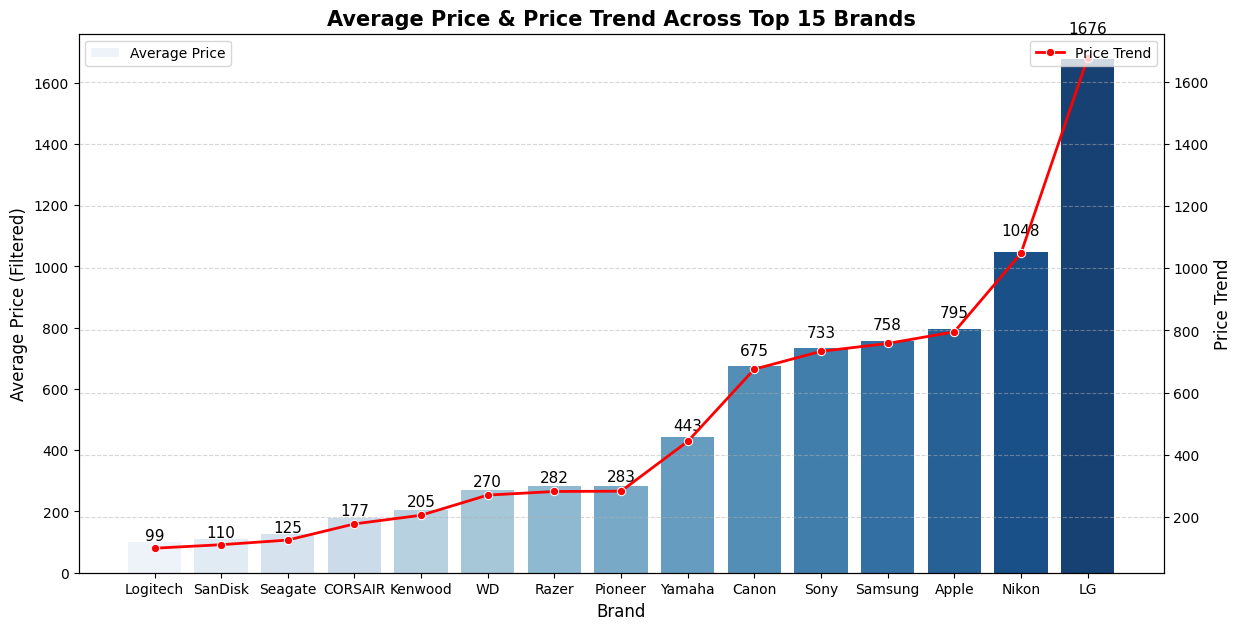

In [8]:
price_threshold = df["avg_price"].quantile(0.99)  
df_filtered = df[df["avg_price"] <= price_threshold]  

top_brands = df_filtered["brand"].value_counts().nlargest(15).index  
df_top_brands = df_filtered[df_filtered["brand"].isin(top_brands)] 

brand_avg_price = df_top_brands.groupby("brand")["avg_price"].mean().sort_values()
plt.figure(figsize=(14, 7))

# Bar Chart - Average Price Per Brand
ax = sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="Blues", label="Average Price")  

# Line Chart - Price Trend Across Brands
ax2 = ax.twinx()  # Create secondary y-axis
sns.lineplot(x=brand_avg_price.index, y=brand_avg_price.values, marker="o", linewidth=2, color="red", label="Price Trend", ax=ax2)

ax.set_axisbelow(True)  # Moves grid behind bars
ax2.grid(axis="y", linestyle="--", alpha=0.5)  # Apply grid only to the line chart

for i, v in enumerate(brand_avg_price.values):
    ax.text(i, v + (v * 0.05), f"{v:.0f}", ha='center', fontsize=11, color="black")

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.title("Average Price & Price Trend Across Top 15 Brands", fontsize=15, fontweight="bold")
ax.set_xlabel("Brand", fontsize=12)
ax.set_ylabel("Average Price (Filtered)", fontsize=12)
ax2.set_ylabel("Price Trend", fontsize=12)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x)}'))
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x)}'))

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

# 📊 Visualization 4: Histogram of Product Prices

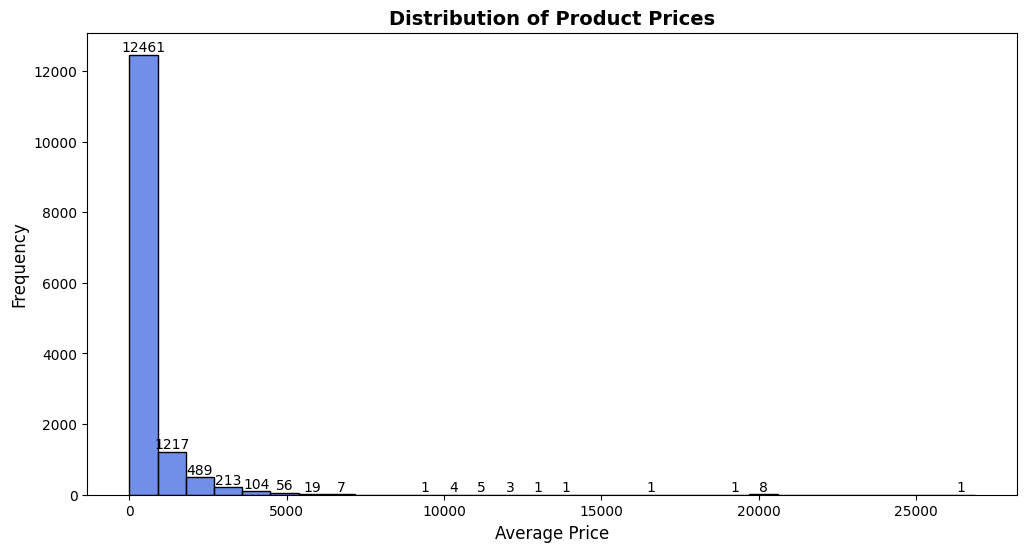

In [9]:
# Histogram of Product Prices
plt.figure(figsize=(12, 6))
ax = sns.histplot(df["avg_price"], bins=30, color="royalblue", edgecolor="black")

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title("Distribution of Product Prices", fontsize=14, fontweight="bold")
plt.xlabel("Average Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# 📊 Visualization 5: Heatmap - Correlation Matrix

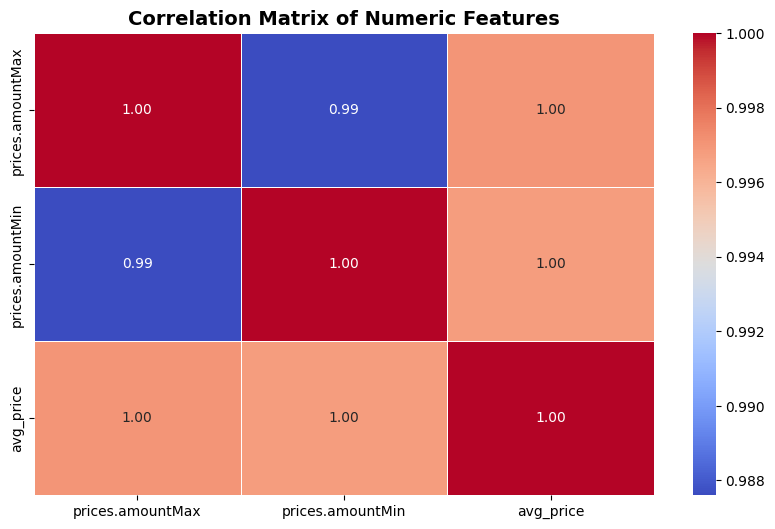

In [10]:
# Heatmap - Correlation Matrix
corr_matrix = df[["prices.amountMax", "prices.amountMin", "avg_price"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=14 ,fontweight="bold")
plt.show()

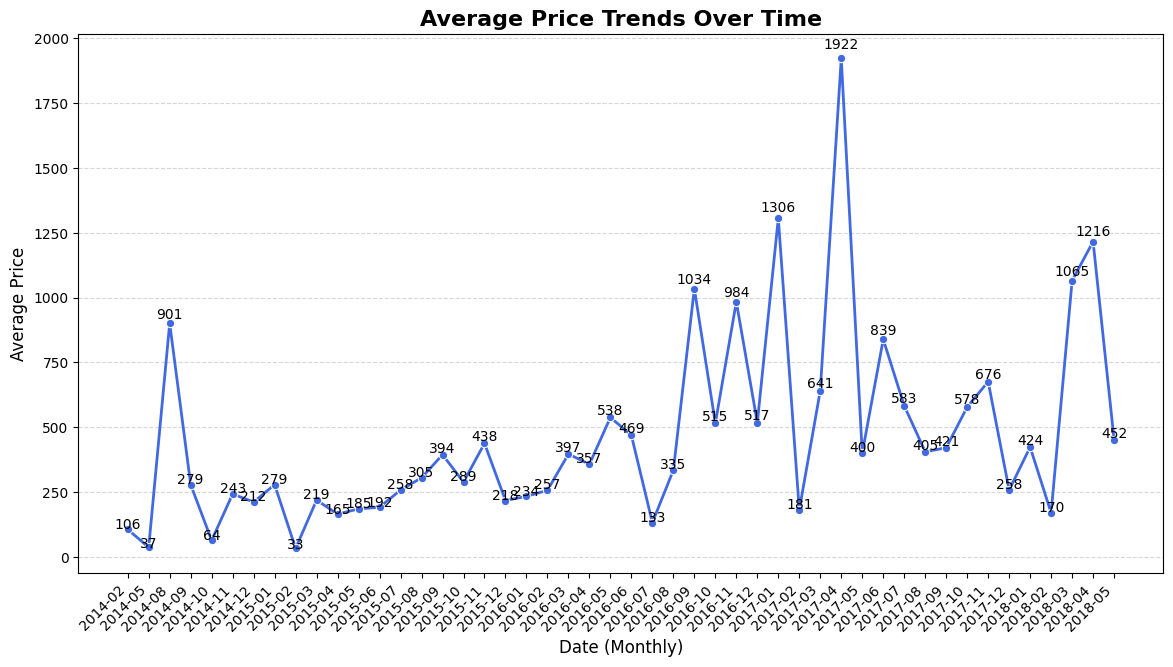

In [11]:
# Average Price Trends Over Time

if "dateAdded" in df.columns:
    df["dateAdded"] = pd.to_datetime(df["dateAdded"], errors="coerce").dt.tz_localize(None)  
    df_trend = df.groupby(df["dateAdded"].dt.to_period("M"))["avg_price"].mean().reset_index()
    df_trend["dateAdded"] = df_trend["dateAdded"].astype(str)  # Convert period to string

    # Line Chart - Average Price Trend Over Time
    plt.figure(figsize=(14, 7))
    ax = sns.lineplot(data=df_trend, x="dateAdded", y="avg_price", marker="o", linewidth=2, color="royalblue")

    # Add text labels for key points
    for i, v in enumerate(df_trend["avg_price"]):
        plt.text(i, v + (v * 0.02), f"{v:.0f}", ha="center", fontsize=10, color="black")  

    plt.xlabel("Date (Monthly)", fontsize=12)
    plt.ylabel("Average Price", fontsize=12)
    plt.title("Average Price Trends Over Time", fontsize=16, fontweight="bold")
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

else:
    print("dateAdded' column not found. Cannot generate price trend chart.")


# 📊 PCA & Market Segmentation

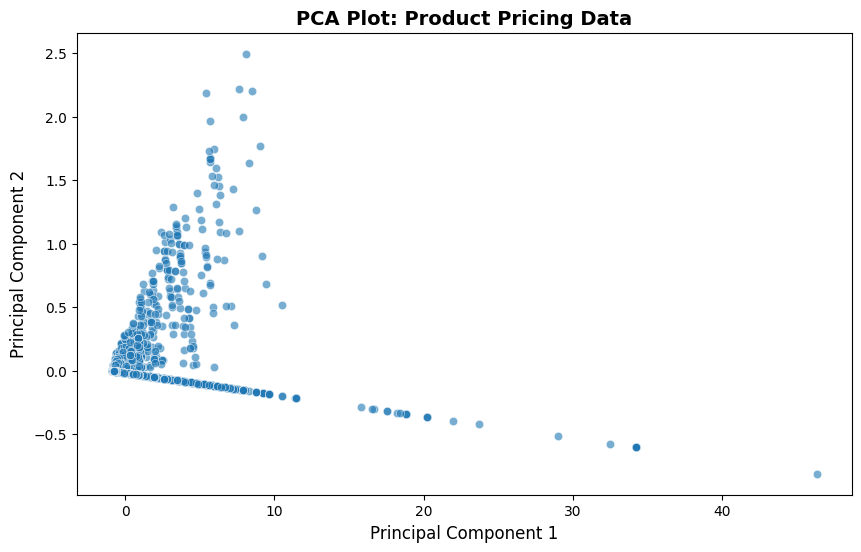

In [12]:
### PCA - Dimensionality Reduction
features = ["prices.amountMax", "prices.amountMin", "avg_price"]
df_pca = df.dropna(subset=features).copy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pca[features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

df_pca["PCA1"] = pca_result[:, 0]
df_pca["PCA2"] = pca_result[:, 1]

# Scatter Plot - PCA Result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PCA1"], y=df_pca["PCA2"], alpha=0.6)
plt.title("PCA Plot: Product Pricing Data", fontsize=14 , fontweight="bold")
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.show()

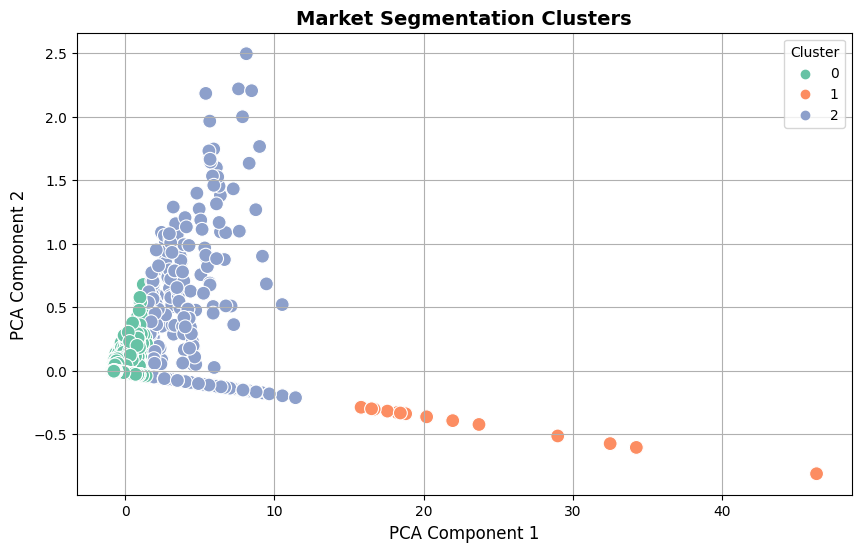

In [13]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
df_pca["Cluster"] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PCA1"], y=df_pca["PCA2"], hue=df_pca["Cluster"], palette="Set2", s=100)
plt.title("Market Segmentation Clusters", fontsize=14, fontweight="bold")
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [14]:
# 📌 Display Cluster Information
cluster_counts = df_pca["Cluster"].value_counts().sort_index()
print("\n📌 Market Segmentation Summary:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} Products")


📌 Market Segmentation Summary:
Cluster 0: 13231 Products
Cluster 1: 26 Products
Cluster 2: 1335 Products
